In [29]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import re

In [30]:

wap_ru = open('warandpeace.txt','r')
wap_eng = open('warandpeaceeng.txt','r')

anna_ru = open('AnnaKarenina.txt','r')
anna_text = ''.join(anna_ru.readlines())

hero_ru = open('hero.txt','r')
hero_text = ''.join(hero_ru.readlines())

wap_text_s = re.sub(' +',' ',re.sub('[^а-яА-Я ]+', ' ', wap_text).lower())
anna_text_s = re.sub(' +',' ',re.sub('[^а-яА-Я ]+', '', anna_text).lower())
hero_text_s = re.sub(' +',' ',re.sub('[^а-яА-Я ]+', '', hero_text).lower())

wap_en = open('WarAndPeaceEng.txt','r')
wapen_text = ''.join(wap_en.readlines())
wapen_text_s = re.sub(' +',' ',re.sub('[^a-zA-Z ]+', '', wap_text).lower())


target_text = """←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"""



Функция build_freq_dict_n строит отсортированный словарь н-грамм

In [31]:
def build_freq_dict_n(text, token_len):
    sym_dict_wap = {}
    tokens = []
    text_arr = []
    pos = 0
    res = list(text)
    
    text_arr.append(text)
    for i in range(0, token_len-1):
        text_arr.append(text[i+1:])
        
    res = list(zip(*text_arr))
    total_dict_len = len(res)
    for c in res:
        tkn = ''.join(c)
        if tkn in sym_dict_wap:
            sym_dict_wap[tkn] += 1/total_dict_len
        else:
            sym_dict_wap[tkn] = 1/total_dict_len
    return {k:v for k, v in sorted(sym_dict_wap.items(), key=lambda item: -item[1])}# sym_dict_wap

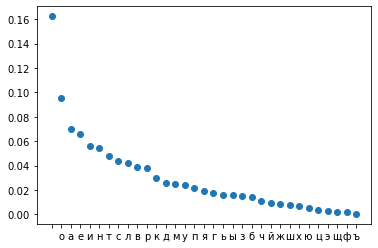

In [39]:
wap_sym_dict = build_freq_dict_n(wap_text_s,1) 
wap_sym_dict


x = wap_sym_dict.keys()
y = wap_sym_dict.values()
plt.scatter(x,y)
plt.show()

Функция для подмены символов

In [94]:
import random
def shuffle_text(text):
    text_dict = {}
    for c in text:
        if c in text_dict:
            text_dict[c] += 1
        else:
            text_dict[c] = 1
    used_codes =[]
    translation_dict = {}
    for key in text_dict:
        new_key  = random.randint(1,250)
        while new_key in used_codes:
            new_key  = random.randint(1,250)
        used_codes.append(new_key)
        translation_dict[ord(key)] = new_key
    
    return text.translate(translation_dict)
    

Запутаем Анну Каренину

In [95]:

anna_text_obf = shuffle_text(anna_text_s)
print(anna_text_obf[:100])

ääÌä/ä±C/ä/ÝÄwëÝää/ÁwëÌ±ä±ús¹úÁ±sÄÁ±Î±äó/äÁÄOÄÁúg"@±Ì/Ý±@ÌÝ±"úÄ


In [96]:
def restore_text(shuffled_text, text_to_buil_dict, n_gram_len):
    #словари отсортированных по вероятности н-грамм
    letters_dict_src = build_freq_dict_n(text_to_buil_dict, n_gram_len)
    letters_dict_trg = build_freq_dict_n(shuffled_text, n_gram_len)
    #алфавиты
    alphabet_dict_trg = build_freq_dict_n(shuffled_text, 1)
    alphabet_dict_src = build_freq_dict_n(text_to_buil_dict, 1)
    
    #Склейка н-граммы словаря и переводимого текста в порядке сортировки
    letters_dict_src_sorted = [k for k, v in sorted(letters_dict_src.items(), key=lambda item: -item[1])]
    letters_dict_trg_sorted = [k for k, v in sorted(letters_dict_trg.items(), key=lambda item: -item[1])]
    
    translation_dict = {l1:l2 for l1,l2 in list(zip(letters_dict_trg_sorted,letters_dict_src_sorted))}
    #Заготовка для побуквенного перевода
    translation_dict_letter = {x:{y:0 for y in alphabet_dict_src} for x in alphabet_dict_trg}
    
    #для каждой буквы шифра подсчитываем количество возможных переводов исходя из склеенных биграмм
    for t1,t2 in translation_dict.items():
        for char_number in range(len(t1)):
            translation_dict_letter[t1[char_number]][t2[char_number]] += 1

    #рассчитываем наиболее вероятный (часто встречающийся) перевод для каждой буквы
        letter_translation_dict = {}
    used_letters = []
    for letter, translations in  translation_dict_letter.items():
        translations_remaining = {l:t for l,t in translations.items() if l not in used_letters}
        best_letter = sorted(translations_remaining.items(), key=lambda item: -item[1] )
       
        letter_translation_dict[letter] = best_letter[0][0]
        used_letters.append(best_letter[0][0])
     
    mytable = obf_text.maketrans(letter_translation_dict)
    one_letter_translation = obf_text.translate(mytable)
    return one_letter_translation




In [99]:
print('Anna Karenina, one letter')
print('-----------------')
ng_len = 1
text_to_obf = anna_text_s
text_to_buil_dict =wap_text_s
obf_text = shuffle_text(text_to_obf.lower())
restored = restore_text(obf_text,text_to_buil_dict, ng_len )

print('исходный текст       ->', text_to_obf[:100])
print('зашифрованый текст   ->',obf_text[:100])
print('востановленный текст ->',restored[:100])

translation_res = list(zip(build_freq_dict_n(restored.lower(),ng_len),build_freq_dict_n(wap_text_s.lower(),ng_len)))
good = 0
for i in range(len(restored)):
    #print(restored[i],text_to_obf[i])
    if restored[i] == text_to_obf[i]:
        good += 1
print('good_percent = ',round(good/len(restored),3),len(restored))
print('-----------------')
print('\n')
print('Hero, one letter')
print('-----------------')
ng_len = 1
text_to_obf = hero_text_s
text_to_buil_dict =wap_text_s
obf_text = shuffle_text(text_to_obf.lower())
restored = restore_text(obf_text,text_to_buil_dict, ng_len )

print('исходный текст       ->', text_to_obf[:100])
print('зашифрованый текст   ->',obf_text[:100])
print('востановленный текст ->',restored[:100])

translation_res = list(zip(build_freq_dict_n(restored.lower(),ng_len),build_freq_dict_n(wap_text_s.lower(),ng_len)))
good = 0
for i in range(len(restored)):
    #print(restored[i],text_to_obf[i])
    if restored[i] == text_to_obf[i]:
        good += 1
print('good_percent = ',round(good/len(restored),3),len(restored))
print('-----------------')  
print('\n')
print('\n')
print('Anna Karenina, two letters')
print('-----------------')
ng_len = 2
text_to_obf = anna_text_s
text_to_buil_dict =wap_text_s
obf_text = shuffle_text(text_to_obf.lower())
restored = restore_text(obf_text,text_to_buil_dict, ng_len )

print('исходный текст       ->', text_to_obf[:100])
print('зашифрованый текст   ->',obf_text[:100])
print('востановленный текст ->',restored[:100])


translation_res = list(zip(build_freq_dict_n(restored.lower(),ng_len),build_freq_dict_n(wap_text_s.lower(),ng_len)))
good = 0
for i in range(len(restored)):
    #print(restored[i],text_to_obf[i])
    if restored[i] == text_to_obf[i]:
        good += 1
print('good_percent = ',round(good/len(restored),3),len(restored))
print('-----------------')
print('\n')
print('Hero, two letters')
print('-----------------')
ng_len = 2
text_to_obf = hero_text_s
text_to_buil_dict =wap_text_s
obf_text = shuffle_text(text_to_obf.lower())
restored = restore_text(obf_text,text_to_buil_dict, ng_len )

print('исходный текст       ->', text_to_obf[:100])
print('зашифрованый текст   ->',obf_text[:100])
print('востановленный текст ->',restored[:100])

translation_res = list(zip(build_freq_dict_n(restored.lower(),ng_len),build_freq_dict_n(wap_text_s.lower(),ng_len)))
good = 0
for i in range(len(restored)):
    #print(restored[i],text_to_obf[i])
    if restored[i] == text_to_obf[i]:
        good += 1
print('good_percent = ',round(good/len(restored),3),len(restored))
print('-----------------') 

Anna Karenina, one letter
-----------------
исходный текст       -> анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все
÷.E³$dEî÷8d÷E°dEÍ÷°³Í÷`÷EdCd$Í³oE³Íd$.EdM÷îC
востановленный текст -> еиие кераиние одни нч семьх чиемаинтьх ромеиов лгве толстоыо иебниеатся стевшаж ефорнчмом фречож вса
good_percent =  0.628 1689721
-----------------


Hero, one letter
-----------------
исходный текст       -> и вот прозвучал голос змея смертный держит небо с богами что же тогда титаныи услышал мы не нужны не
зашифрованый текст   -> ?|8R|28ùfä|q8ä8|ZSi|ZSR³_6|7Sª?R|³S¶8||¶8qfZ?|R8|ªS|R8q7f|R?Rf³_?|ùä_$fä|Z_|³S|³ùª³_|³S
востановленный текст -> е кот млозкьйив ыовос зрая сралтнуч далшет наго с гоыире йто ша тоыди тетинуе ьсвужив ру на ньшну на
good_percent =  0.484 3728
-----------------




Anna Karenina, two letters
-----------------
исходный текст       -> анна каренина один из самых знаменитых романов льва толстого начинается с

Переход к двухбуквенным сочетаниям только ухудшает результат лобового сопоставления частот. Вариантов с близкими частотами становится больше, правильные сопоставления, соотвтетсвенно, случаются реже.

Идея применения MCMC получилась следующая:
1) для каждой биграммы опорного текста считаем количество её появлений.

2) находим количесвто появлений каждой буквы опорного текста.

3) делим каждый счётчик из п.1 на количество появлений первой буквы - при этом получается вероятность встретить вторую букву биграммы при условии того, что мы встретили первую

4) строим список всех слов из опорного текста, которые встречались более чем n=10 раз (ограничение отсеивает большую часть мусора)

5) строим начальный перевод при помощи побуквенного сопоставления частот (как в первой части задания)

Таким образом к моменту начала итерирования у нас есть начальное сопоставление букв в виде двух массивов, список вероятностей перехода между буквами и список ожидаемых слов.

На каждой итерации производится попытка переставить местами две буквы в массиве переводов.

Далее вычисляется сумма логарифмов вероятностей встретить все биграммы, которые получились после перевода с измененным словарём исходя из списка вероятностей перехода опорного текста (чтобы избавиться от перемножения)
и применяется критерий MCMC для соотношения вероятностей текущей и предыдущей попытки, и, если он выполняется, 
сохраняется новый мэппинг символов.

К сожалению, этот теоретически хороший метод так и не начал сходиться (хотя для правильного решения результат вычисления вероятности получается максимальным)

Пришлось добавить три дополнтельных механизма
- отброс в начало для случая когда улучшения результата не происходит

- поиск "хороших слов": при нахождении в результате перевода слова из опорного текста перевод его букв "замораживается" и может измениться с минимальной вероятностью

После этого решение сошлось.


In [446]:
def build_freq_dict_n(text, token_len, prob = True):
    sym_dict_wap = {}
    tokens = []
    text_arr = []
    pos = 0
    res = list(text)
    
    text_arr.append(text)
    
    for i in range(0, token_len-1):
        text_arr.append(text[i+1:])
        
    res = list(zip(*text_arr))
    if prob:
        total_dict_len = len(res)    
    else:
        total_dict_len = 1
    for c in res:
        tkn = ''.join(c)
        
        if tkn in sym_dict_wap:
            sym_dict_wap[tkn] += 1/total_dict_len
        else:
            sym_dict_wap[tkn] = 1/total_dict_len
    return {k:v for k, v in sorted(sym_dict_wap.items(), key=lambda item: -item[1])}# sym_dict_wap



def restore_text_prob4(obf_text, dict_text, n_gram_len):
    
    def log_like(text, prob_dict, n_gram_len):
        cnts = build_freq_dict_n(text, n_gram_len, False)
        res = 0
        for key, cnt in cnts.items():
            if key in prob_dict:
                res += np.log(cnt * prob_dict[key])
        return(res)
    
    
    dict_words_all = dict_text.split(' ')
    dict_words_dict = {}
    
    for word in dict_words_all:
        if word in dict_words_dict:
            dict_words_dict[word] += 1
        else:
            dict_words_dict[word] = 1
    dict_words = set([x for x, n in dict_words_dict.items() if n > 10])        
    print(len(dict_words))
            
    
    #алфавиты для опорного и анализируемого текста
    letters_dict_src = build_freq_dict_n(dict_text, 1)
    letters_dict_trg = build_freq_dict_n(obf_text, 1)
    
    letters_dict_src_sorted = [k for k, v in sorted(letters_dict_src.items(), key=lambda item: -item[1])]
    letters_dict_trg_sorted = [k for k, v in sorted(letters_dict_trg.items(), key=lambda item: -item[1])]
    first_translation = list(zip(letters_dict_trg_sorted,letters_dict_src_sorted))
    len_trans = len(letters_dict_src_sorted)
    first_translation_dict = {l1:l2 for l1,l2 in list(zip(letters_dict_trg_sorted,letters_dict_src_sorted))}
    
    mytable = obf_text.maketrans(first_translation_dict)
    one_letter_translation = obf_text.translate(mytable)
    # начальный перевод
    print(one_letter_translation[:100])
    
    
    letters_dict_src_ng = build_freq_dict_n(dict_text, n_gram_len, False)
    letters_dict_src_one = build_freq_dict_n(dict_text, 1, False)
    letters_dict_trg_ng = build_freq_dict_n(one_letter_translation, n_gram_len)
    prob_dict = {}
    # считаем вероятности для каждой н-граммы появится при условии того, что мы стоим на её первой букве
    # пришлось добавить единички для вменяемого значения логарифмов
    for key, cnt in letters_dict_src_ng.items():
        prob_dict[key]=cnt/ letters_dict_src_one[key[0]]+1
        
    # инициализация переменных для МСМС
    current_text = one_letter_translation
    current_log = log_like(one_letter_translation, prob_dict, n_gram_len)-10
    best_log = current_log
    i = 0
    letters_dict_src_sorted_bp = letters_dict_src_sorted.copy()
    print(best_log)
    frozen_letters = {}
    matched_words = []
    
    local_best = ''
    reset_cnt = 0
    history = []
    best_text = current_text
    # 4 - подобралось на глаз)
    while reset_cnt <= 4: 
        # выбираем две буквы для перестановки
        letters_to_switch = random.sample([x for x in range(1,len_trans)], 2)
        rnd_unfreeze =  np.random.random()
        # если они пересекаются с замороженными, пытаемся "разморозить" с маленьким шансом
        while (letters_to_switch[0] in frozen_letters or letters_to_switch[1] in frozen_letters) and rnd_unfreeze < 0.999:
            letters_to_switch = random.sample([x for x in range(1,len_trans)], 2)
            rnd_unfreeze =  np.random.random()
        
        # переставляем буквы в словаре   
        new_dict = letters_dict_src_sorted.copy()
        new_dict[letters_to_switch[0]],new_dict[letters_to_switch[1]] =\
        new_dict[letters_to_switch[1]],new_dict[letters_to_switch[0]]
        first_translation = list(zip(letters_dict_trg_sorted,new_dict))
        first_translation_dict = {l1:l2 for l1,l2 in list(zip(letters_dict_trg_sorted,new_dict))}
        mytable = obf_text.maketrans(first_translation_dict)
        new_one_letter_translation = obf_text.translate(mytable)
        
        
        new_log = log_like(new_one_letter_translation, prob_dict, n_gram_len)
        
        if new_log/current_log > np.random.random():
            history.append(new_log)
            # если была разморозка - обрабатываем список "замороженных" букв
            if (letters_to_switch[0] in frozen_letters or letters_to_switch[1] in frozen_letters):
                    if rnd_unfreeze > 0.999:
                        if letters_to_switch[0] in frozen_letters :
                            del frozen_letters[letters_to_switch[0]]
                            matched_words = []
                        if letters_to_switch[1] in frozen_letters :
                            del frozen_letters[letters_to_switch[1]]
                            matched_words = []
                            
            letters_dict_src_sorted = new_dict.copy()
            if new_log > current_log:
                
                local_best = new_one_letter_translation
                # ищем правильные слова в переводе
                translated_words = set(new_one_letter_translation.split(' '))

                for word in translated_words:
                    if word in dict_words and len(word) >2 and word not in matched_words:
                        for letter in (word):
                            pass
                            frozen_letters[letters_dict_src_sorted.index(letter)] = 1
                        matched_words.append(word)
            if new_log > best_log:
                print(f' score = {round(new_log, 4)}  заморожено букв-{len(frozen_letters)} найдены слова-{matched_words}')
                best_log = new_log
                best_text = new_one_letter_translation
                i = 0
                reset_cnt = 0
            else:
                i += 1
        
        # сбрасываем поиск если он совсем застрял и считаем последовательные сбросы для выхода из цикла
        if i > 100000:
            letters_dict_src_sorted = letters_dict_src_sorted_bp.copy()
            current_log = new_log
            i = 0
            frozen_letters = {}
            matched_words = []
            reset_cnt +=1
            
            current_log = log_like(one_letter_translation, prob_dict, n_gram_len)
            print('RESET')
            
            
    return best_text
            
            
        
    

Для биграмм всё работает относительно честно:

In [447]:
ng_len = 2
text_to_buil_dict =wap_text_s
obf_text = target_text
restored = restore_text_prob4(obf_text,text_to_buil_dict,  ng_len)


print('FINAL:')
print(restored)

1137
33 28
олие рд реяесо навгтиундь еие памсе навгтиундь соклс з шсаыа лаабйонеч касавдь иоыка пваместсу лкаво
45.14986883042641
 score = 54.1623  заморожено букв-0 найдены слова-[]
 score = 55.893  заморожено букв-0 найдены слова-[]
 score = 56.6528  заморожено букв-0 найдены слова-[]
 score = 57.1878  заморожено букв-0 найдены слова-[]
 score = 57.6467  заморожено букв-5 найдены слова-['ура', 'тот']
 score = 58.6704  заморожено букв-5 найдены слова-['ура', 'тот']
 score = 59.39  заморожено букв-5 найдены слова-['ура', 'тот']
 score = 59.8375  заморожено букв-5 найдены слова-['ура', 'тот']
 score = 59.8987  заморожено букв-5 найдены слова-['уже', 'тот']
RESET
RESET
 score = 59.9259  заморожено букв-15 найдены слова-['если', 'или', 'ничего', 'легко', 'все', 'всего', 'хоть', 'почти', 'этого']
 score = 60.177  заморожено букв-16 найдены слова-['если', 'или', 'ничего', 'легко', 'все', 'всего', 'хоть', 'почти', 'этого', 'видите', 'последнее']
 score = 60.3086  заморожено букв-16 найдены с

А вот для триграмм.. Метрика получается с формулировкой "встретить две следующих буквы в определенном порядке после первой", что не очень честно. Но, если запустить ту же функцию, процесс сходится. Иногда даже быстрее чем для биграмм. 


In [449]:
ng_len = 3
text_to_obf = target_text
text_to_buil_dict =wap_text_s
obf_text = da_text
restored = restore_text_prob4(obf_text,text_to_buil_dict,  ng_len)


print('FINAL:')
print(restored)

1137
33 28
олие рд реяесо навгтиундь еие памсе навгтиундь соклс з шсаыа лаабйонеч касавдь иоыка пваместсу лкаво
6.9088023439877055
 score = 15.7995  заморожено букв-0 найдены слова-[]
 score = 15.8398  заморожено букв-3 найдены слова-['два']
 score = 17.5472  заморожено букв-3 найдены слова-['два']
 score = 17.5787  заморожено букв-3 найдены слова-['два']
 score = 18.1305  заморожено букв-5 найдены слова-['два', 'оно']
 score = 18.8455  заморожено букв-5 найдены слова-['два', 'оно']
 score = 18.9843  заморожено букв-5 найдены слова-['два', 'оно']
 score = 19.1524  заморожено букв-3 найдены слова-[]
 score = 21.0111  заморожено букв-5 найдены слова-['оно', 'два']
 score = 21.3852  заморожено букв-5 найдены слова-['оно', 'два']
 score = 21.7855  заморожено букв-5 найдены слова-['оно', 'три']
 score = 21.812  заморожено букв-5 найдены слова-['оно', 'три']
RESET
 score = 22.698  заморожено букв-10 найдены слова-['берг', 'самые', 'сам', 'тут']
RESET
RESET
 score = 23.9751  заморожено букв-8


Для ng_len > 3 уже ничего хорошего не получается, как мне кажется это связано с тем, что мы наблюдаем слишком маленькое количество комбинаций и MCMC уже не может восстановить распределение

Что касается возможных применений - первое, что приходит в голову это ошибки кодировки, но восстанавливать их при помощи МСМС это слишком, как мне кажется). Вообще, сама техника "жадного" движения в пространтсве решений может быть отвязана от вероятностей. Получается совершенно универсальный механизм оптимизации не требующий дифференцируемости функции ошибки.

